# MBD - Group C
This is the group deliverable for the group assignment

## 1. Importing correct directories
First we will import the necessary directories

In [1]:
import pandas as pd
import missingno as msno
from datetime import date

And after this we will set the correct settings for pandas

In [2]:
pd.options.display.max_columns = None
pd.options.display.max_rows = 100

## 2. Read the dataset
Second we will import the dataset into a pandas dataframe

In [3]:
# Set filename
filename = "./dataset_housing.csv"

# Actually read dataset into a pandas dataframe
data = pd.read_csv(filename)

Now we will do a quick analysis of the data

In [4]:
# Print the data
data

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,1999,2000,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,953,953,GasA,Ex,Y,SBrkr,953,694,0,1647,0,0,2,1,3,1,TA,7,Typ,1,TA,Attchd,1999.0,RFn,2,460,TA,TA,Y,0,40,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1978,1988,Gable,CompShg,Plywood,Plywood,Stone,119.0,TA,TA,CBlock,Gd,TA,No,ALQ,790,Rec,163,589,1542,GasA,TA,Y,SBrkr,2073,0,0,2073,1,0,2,0,3,1,TA,7,Min1,2,TA,Attchd,1978.0,Unf,2,500,TA,TA,Y,349,0,0,0,0,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,9,1941,2006,Gable,CompShg,CemntBd,CmentBd,None,0.0,Ex,Gd,Stone,TA,Gd,No,GLQ,275,Unf,0,877,1152,GasA,Ex,Y,SBrkr,1188,1152,0,2340,0,0,2,0,4,1,Gd,9,Typ,2,Gd,Attchd,1941.0,RFn,1,252,TA,TA,Y,0,60,0,0,0,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,6,1950,1996,Hip,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,TA,TA,Mn,GLQ,49,Rec,1029,0,1078,Gas

In [5]:
# Print shape of the data we have
print(data.shape)

(1460, 81)


## 3. Missing values

### 3.1. Missing values understanding

First we will see how many missing values we have in the each column and what type of data these columns have

In [6]:
# Variable of number of missing values per column
num_missing_values = data.isna().sum()

# See where there actually are missing values
print(num_missing_values[num_missing_values != 0])

# See what type of data the columns with missing values have
print("\n")
print(data[pd.DataFrame(num_missing_values[num_missing_values != 0]).index.tolist()].dtypes)

LotFrontage      259
Alley           1369
MasVnrType         8
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64


LotFrontage     float64
Alley            object
MasVnrType       object
MasVnrArea      float64
BsmtQual         object
BsmtCond         object
BsmtExposure     object
BsmtFinType1     object
BsmtFinType2     object
Electrical       object
FireplaceQu      object
GarageType       object
GarageYrBlt     float64
GarageFinish     object
GarageQual       object
GarageCond       object
PoolQC           object
Fence            object
MiscFeature      object
dtype: object


Second, we will do three different plots to understand the missing values better:
- Barchart with the number of missing values inside each variable
- Matrix of missing values (this was finally deleted as it was not easy to format)
- Correlation of missing values

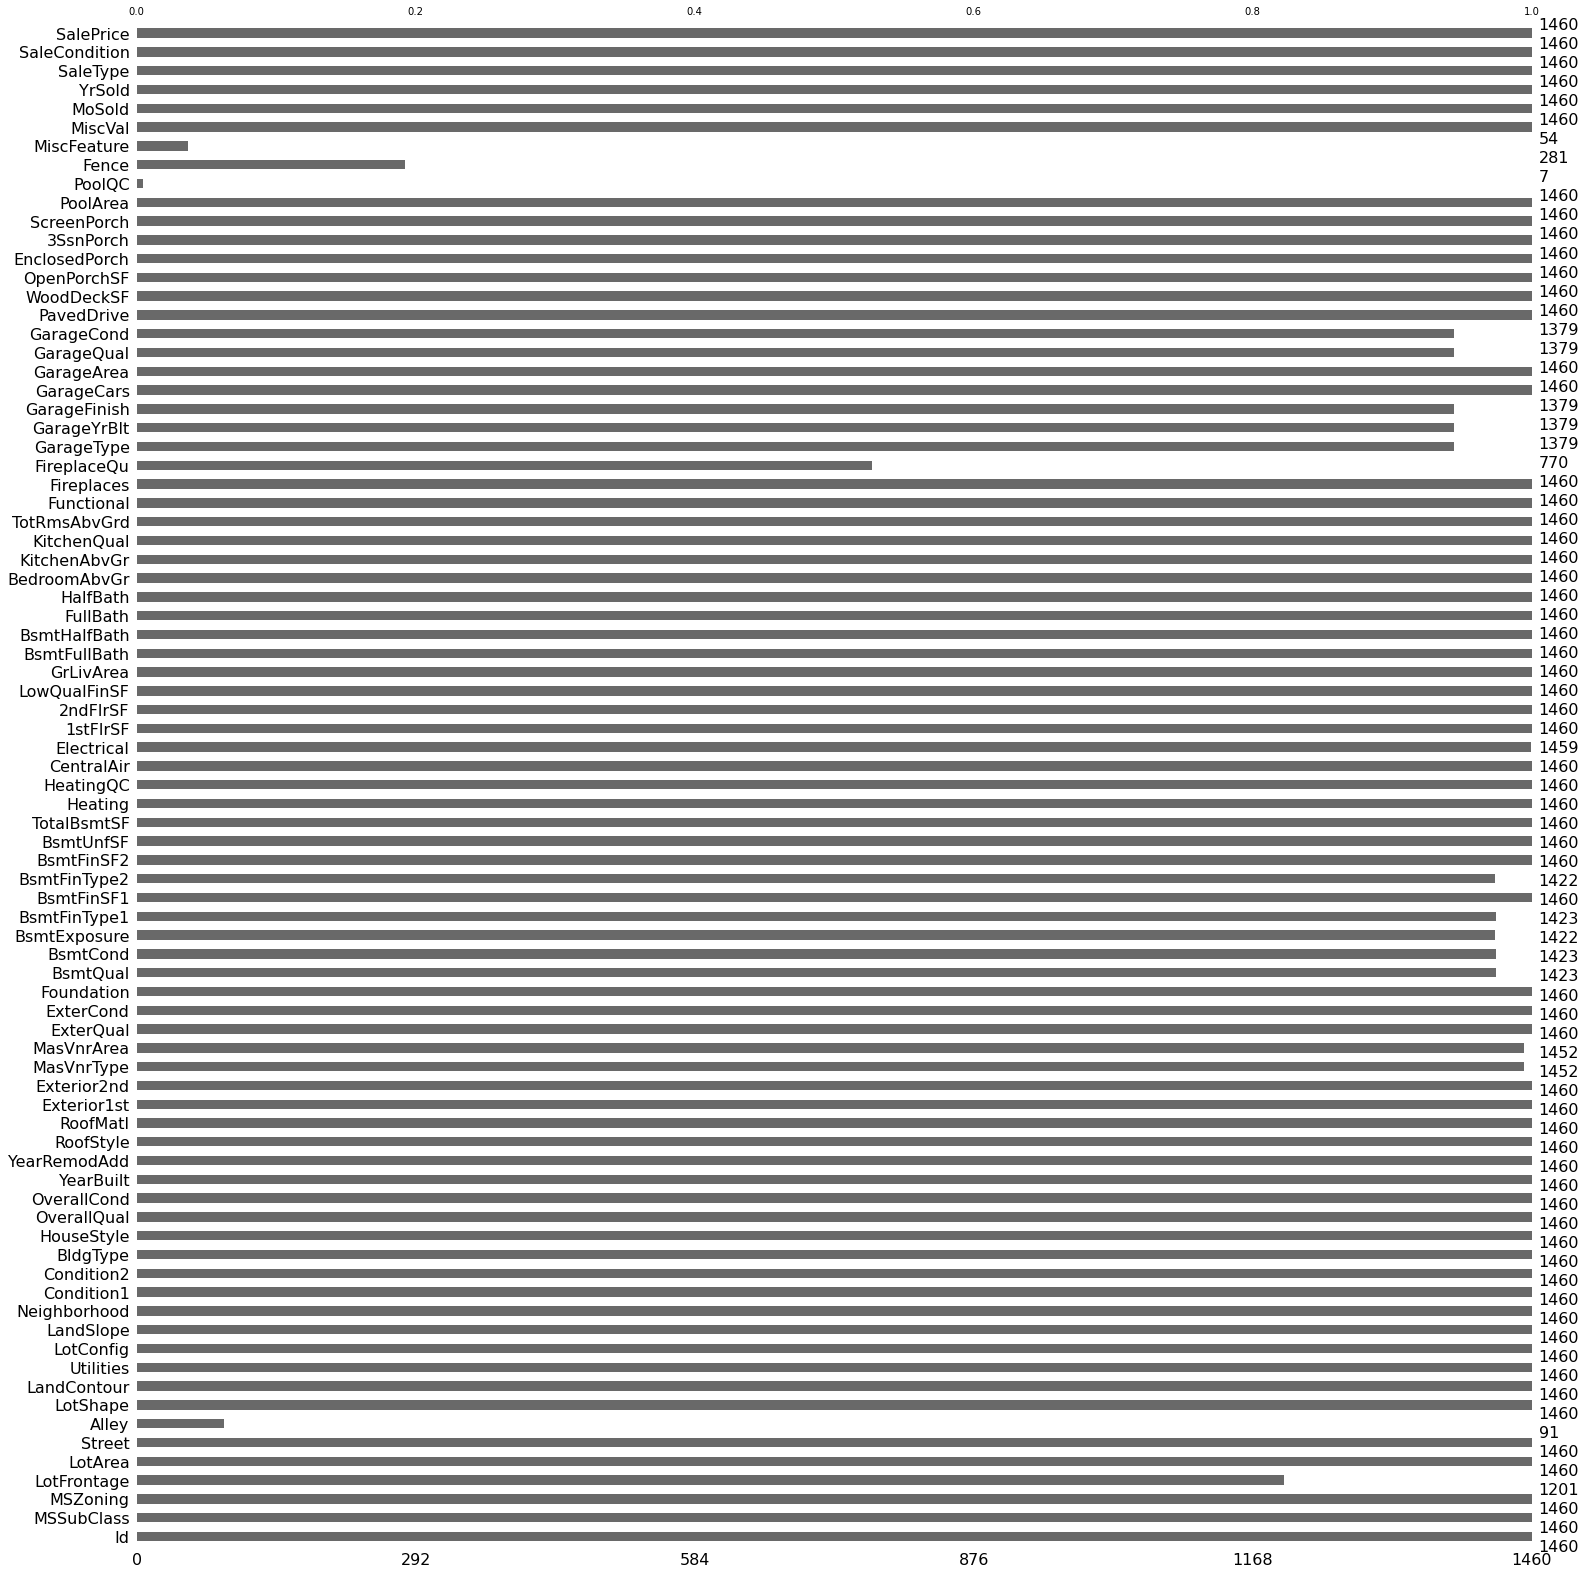

In [7]:
# Bar-chart
msno.bar(data);

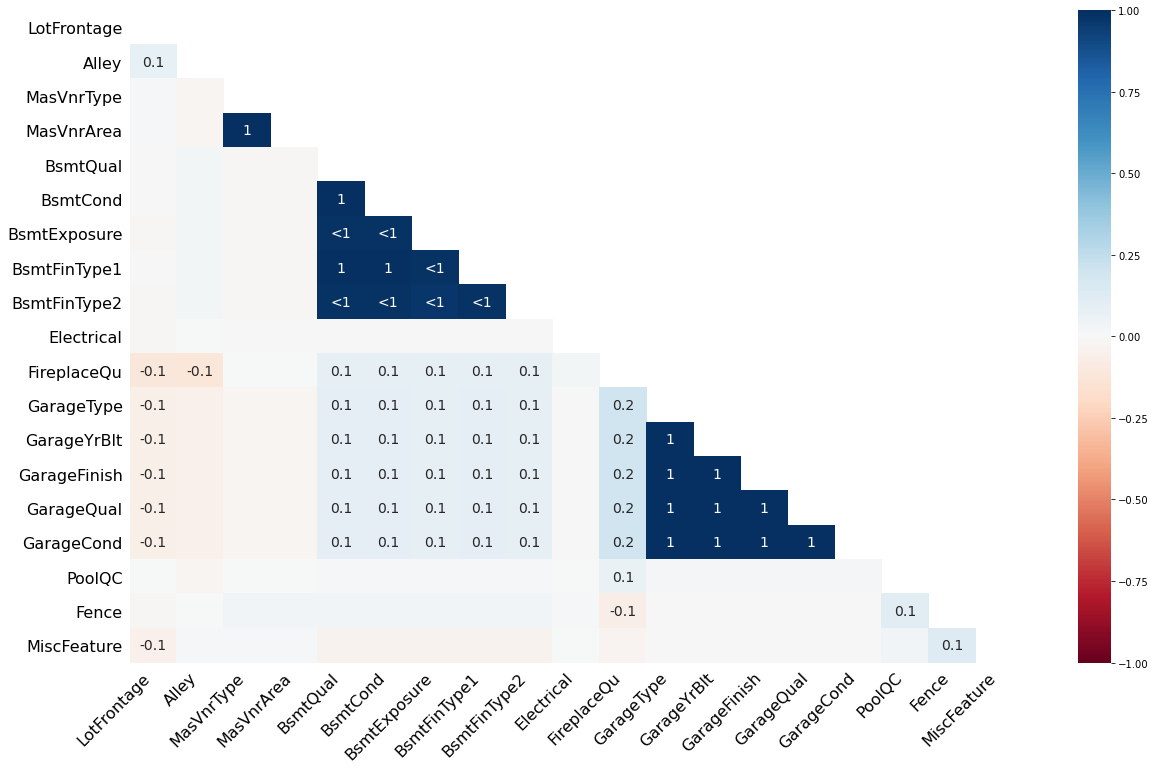

In [8]:
# Correlation matrix
msno.heatmap(data);

Key takeaways from missing value examination:
- Most variables don't have a lot of missing values (less than 20%). Those that do, usualy is because they describe a feature that houses don't usually have (like a pool, fence, alley, etc).
- Variables that describe similar things will have a high missing value correlation (ex. those that describe basement will all be missing when the house has no basement).

### 3.2. Missing values handling

For each of the columns above, we will do the following transformations to deal with the missing values:
 
 - **Column LotFrontage**: There are 259 missing values for this column, we can assume it could mean that those particular houses do not have an area connected to the street. So these missing values will be filled with 0.
 
 - **Column Alley**: There are 1369 missing values for this column, it can be interpreted that those missing value mean that those houses do not have an alley access. Hence, we can replace the missing value with No Alley.
 
 - **Column MasVnrType**: Since those missing values are only 0.55% of our column, we can now decide to drop those rows.
 
 - **Column MasVnrArea**: Since we know that MasVnrType and MasVnrArea go hand in hand, we can assume that those missing value have also been dropped.
 
 - **Column related to basement (BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinType2)**: The missing values come from these houses not having a basement. What is done is assigning a new category "No Basement".
 
 - **Column Electrical**: It only has one missing value, so the row will be dropped.
 
 - **Column FireplaceQu**: The missing values come from the house not having a fireplace. What is done is assigning a new category "No Fireplace".

 - **Column related to garage and categorical (GarageType, GarageFinish, GarageQual, GarageCond)**: The missing values come from the house not having a garage. What is done is assigning a new category "No Garage".
 
 - **Column GarageYrBlt**: This variable is the year the garage was built. As this is a numerical feature, it cannot be filled in with a category ("No Garage"), it needs to be filled in with a number. When checking the values, it was observed that most houses had built the garage and the house at the same time, so it was decided to fill the missing values with the values from the column YearBuilt.
 
 - **Column PoolQC**: We can assume it could mean that those houses do not have a pool. Therefore, we decided to fill these missing values with "No Pool".
 
 - **Column Fence**: As with PoolQC column, these missing values mean that those houses do not have a fence. Hence, we filled it with "No Fence".
 
 - **Column MiscFeature**: Since this column means miscellaneous feature, we can assume that those missing values mean that they have nothing. So we decided to fill those missing values with "None".

In [9]:
# Column LotFrontage
data["LotFrontage"].fillna(0, inplace = True)

# Column Alley
data["Alley"].fillna("No Alley", inplace = True)

# Column MasVnrType
data.dropna(subset = ["MasVnrType"], inplace = True)

# Column BsmtQual
data["BsmtQual"].fillna("No Basement", inplace = True)

# Column BsmtCond
data["BsmtCond"].fillna("No Basement", inplace = True)

# Column BsmtExposure
data["BsmtExposure"].fillna("No Basement", inplace = True)

# Column BsmtFinType1
data["BsmtFinType1"].fillna("No Basement", inplace = True)

# Column BsmtFinType2
data["BsmtFinType2"].fillna("No Basement", inplace = True)

# Column Electrical
data.dropna(subset = ["Electrical"], inplace = True)

# Column FireplaceQu
data["FireplaceQu"].fillna("No Fireplace", inplace = True)

# Column GarageType
data["GarageType"].fillna("No Garage", inplace = True)

# Column GarageFinish
data["GarageFinish"].fillna("No Garage", inplace = True)

# Column GarageQual
data["GarageQual"].fillna("No Garage", inplace = True)

# Column GarageYrBlt
data["GarageYrBlt"].fillna(data["YearBuilt"], inplace = True)

# Column GarageCond
data["GarageCond"].fillna("No Garage", inplace = True)

# Column PoolQC
data["PoolQC"].fillna("No Pool", inplace = True)

# Column Fence
data["Fence"].fillna("No Fence", inplace = True)

# Column MiscFeature
data["MiscFeature"].fillna("None", inplace = True)

Now we will check that there are no more missing values in the dataframe and print the dataframe to have an idea of what it looks like

In [10]:
# Variable of number of missing values per column
num_missing_values = data.isna().sum()

# See where there actually are missing values
print(num_missing_values[num_missing_values != 0])

Series([], dtype: int64)


In [11]:
# Print dataframe
data

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,No Alley,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,No Fireplace,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,No Pool,No Fence,None,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,No Alley,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,No Pool,No Fence,None,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,No Alley,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,No Pool,No Fence,None,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,No Alley,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,No Pool,No Fence,None,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,No Alley,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,No Pool,No Fence,None,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,No Alley,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,1999,2000,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,953,953,GasA,Ex,Y,SBrkr,953,694,0,1647,0,0,2,1,3,1,TA,7,Typ,1,TA,Attchd,1999.0,RFn,2,460,TA,TA,Y,0,40,0,0,0,0,No Pool,No Fence,None,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,No Alley,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1978,1988,Gable,CompShg,Plywood,Plywood,Stone,119.0,TA,TA,CBlock,Gd,TA,No,ALQ,790,Rec,163,589,1542,GasA,TA,Y,SBrkr,2073,0,0,2073,1,0,2,0,3,1,TA,7,Min1,2,TA,Attchd,1978.0,Unf,2,500,TA,TA,Y,349,0,0,0,0,0,No Pool,MnPrv,None,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,No Alley,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,9,1941,2006,Gable,CompShg,CemntBd,CmentBd,None,0.0,Ex,Gd,Stone,TA,Gd,No,GLQ,275,Unf,0,877,1152,GasA,Ex,Y,SBrkr,1188,1152,0,2340,0,0,2,0,4,1,Gd,9,Typ,2,Gd,Attchd,1941.0,RFn,1,252,TA,TA,Y,0,60,0,0,0,0,No Pool,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,No Alley,Reg,Lvl,AllPub,Inside,Gtl,NAme

## 4. Data recoding

In this part we will check the type of data each column has, then we will modify the columns which do not have the correct type. Take into account that this will not always be just casting, some recoding will be needed

### 4.1. Data type obtention

In [12]:
# See what type of data the columns have
print("\n")
print(data.dtypes)



Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
Alley             object
LotShape          object
LandContour       object
Utilities         object
LotConfig         object
LandSlope         object
Neighborhood      object
Condition1        object
Condition2        object
BldgType          object
HouseStyle        object
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
RoofStyle         object
RoofMatl          object
Exterior1st       object
Exterior2nd       object
MasVnrType        object
MasVnrArea       float64
ExterQual         object
ExterCond         object
Foundation        object
BsmtQual          object
BsmtCond          object
BsmtExposure      object
BsmtFinType1      object
BsmtFinSF1         int64
BsmtFinType2      object
BsmtFinSF2         int64
BsmtUnfSF          int64
TotalBsmtSF        int64
Heating           objec

The following columns need to be modified
- Column MSSubClass
- Column MoSold

### 4.2. Data type modification

Now, the following tranformations will be done to the columns mentioned above
- Column MSSubClass: pandas is detecting this as a numerical feature, but it is a categorical one, so it will be change to *object* type. This is correct as well as it is non-ordered categorical variable.
- Column MoSold: pandas is detecting this as a numerical feature, but it should be categorical, as it is actually describes the month of the year (and is not ordered: 1 comes after 12, etc.).

In [13]:
# Column MSSubClass
data['MSSubClass'] = data['MSSubClass'].astype(str)

# Column MoSold
data['MoSold'] = data['MoSold'].astype(str)

## 5. Data preprocessing

Here we will do some small processing on the data to obtain more significant and meaningful features.

### 5.1. Date manipulation

The following features, which are dates, will be changed into time features:
- Column YearBuilt: added new column named HouseAge (year house was sold - YearBuilt). This is more relevant, as there may be a relation between the age of the house and its price.
- Column GarageYrBlt: added new column named GarageAge (year house was sold - GarageTrBlt). This is more relevant, as there may be a relation between the age of the garage and the price of the house.
- Column YearRemodAdd: added new column named RemodAge (year house was sold - YearRemodAdd). This is more relevant, as there may be a relation between the time since the last remodelling of the house and its price.

In [14]:
# Calculate the age of (1) house, (2) garage and (3) remodelling when the house was sold
data['HouseAge'] = data['YrSold'] - data['YearBuilt']
data['GarageAge'] = data['YrSold'] - data['GarageYrBlt']
data['RemodAge'] = data['YrSold'] - data['YearRemodAdd']

# Now we will drop the column YearBuilt
data.drop('YearBuilt', inplace=True, axis=1)
data.drop('GarageYrBlt', inplace=True, axis=1)
data.drop('YearRemodAdd', inplace=True, axis=1)

##### CHANGE THIS PART #####

### 5.2. Categorical to numerical recasting

The ordered categorical variables will be recasted into numerical columns. Take into account that this has a strong assumption: that the distance between each category is the same.

The columns which will go through this process are:
- Column LotShape: this variable assesses the 'irregularity' of the shape of the property. Higher values mean more irregular.
- Column LandContour: this variable assesses the flatness of the property. Higher values mean more depressed.
- Column LandSlope: this variable assesses the slope of the property. Higher values mean more slope.
- Column ExterQual: this variable indicates the Exterior quality. Higher values indicate better quality.
- Column ExterCond: this variable indicates the Exterior condition. Higher values indicate better quality.
- Column BsmtQual: this variable indicates the Basement quality. Higher values indicate better quality.
- Column BsmtCond: this variable indicates the Basement condition. Higher values indicate better quality.
- Column BsmtExposure: this variable indicates the Basement exposure. Higher values indicate better exposure.
- Column BsmtFinType1: this variable indicates the rating of basement finished area. Higher values indicate better exposure.
- Column BsmtFinType2: this variable indicates the rating of basement finished area type 2. Higher values indicate better exposure.
- Column HeatingQC: this variable describes the heating quality and condition. Higher values mean better quality.
- Column KitchenQual: this variable describes the kitchen quality. Higher values mean better quality.
- Column Functional: this variable indicates home functionality. Higher values mean better functionality.
- Column FireplaceQu: this variable indicates the fireplace quality. Higher values indicate better quality.
- Column GarageFinish: this variable indicates the stage of the garage. Higher values indicate better finish.
- Column GarageQual: this variable indicates the garage quality. Higher values indicate better quality.
- Column GarageCond: this variable indicates the garage condition. Higher values indicate better condition.
- Column PoolQc: this variable indicates the pool quality. Higher values indicate better quality.
- Column Fence: this variable indicates the fence quality. Higher values indicate better quality.

In [15]:
# Column LotShape
data['LotShape'] = data['LotShape'].apply(lambda shape: 0 if shape == 'Reg' else (1 if shape == 'IR1' else (2 if shape == 'IR2' else 3)))

# Column LandContour
data['LandContour'] = data['LandContour'].apply(lambda flatness: 0 if flatness == 'Lvl' else (1 if flatness == 'Bnk' else (2 if flatness == 'HLS' else 3)))

# Column LandSlope
data['LandSlope'] = data['LandSlope'].apply(lambda slope: 1 if slope == 'Gtl' else (2 if slope == 'Mod' else 3))

# Column HeatingQC
data['HeatingQC'] = data['HeatingQC'].apply(lambda hqc: 0 if hqc == 'Po' else (1 if hqc == 'Fa' else (2 if hqc == 'TA' else (3 if hqc == 'Gd' else 4))))

# Column KitchenQual
data['KitchenQual'] = data['KitchenQual'].apply(lambda kqc: 0 if kqc == 'Po' else (1 if kqc == 'Fa' else (2 if kqc == 'TA' else (3 if kqc == 'Gd' else 4))))

# Column Functional
data['Functional'] = data['Functional'].apply(lambda func: 0 if func == 'Sal' else (1 if func == 'Sev' else (2 if func == 'Maj2' else (3 if func == 'Maj1' else (4 if func == 'Mod' else (5 if func == 'Min2' else (6 if func == 'Min1' else 7)))))))

# Column FireplaceQu
data['FireplaceQu'] = data['FireplaceQu'].apply(lambda fqc: 0 if fqc == 'Po' or fqc == 'No Fireplace' else (1 if fqc == 'Fa' else (2 if fqc == 'TA' else (3 if fqc == 'Gd' else 4))))

# Column GarageFinish
data['GarageFinish'] = data['GarageFinish'].apply(lambda gqc: 0 if gqc == 'Unf' or gqc == 'No Garage' else(1 if gqc =='Rfn' else 2))

# Column GarageQual
data['GarageQual'] = data['GarageQual'].apply(lambda gqc: 0 if gqc == 'Poor' or gqc =='No Garage' else(1 if gqc=='Fa' else(2 if gqc=='TA' else (3 if gqc=='Gd' else 4))))

# Column GarageCond
data['GarageCond'] = data['GarageCond'].apply(lambda fqc: 0 if fqc == 'Poor' or fqc =='No Garage' else(1 if fqc=='Fa' else(2 if fqc=='TA' else (3 if fqc=='Gd' else 4))))

# Column PoolQc
data['PoolQC'] = data['PoolQC'].apply(lambda fqc: 0 if fqc == 'Poor' or fqc =='No Pool' else(1 if fqc=='Fa' else(2 if fqc=='TA' else (3 if fqc=='Gd' else 4))))

# Column Fence
data['Fence'] = data['Fence'].apply(lambda fqc: 0 if fqc == 'MnWw' or fqc =='No Fence' else(1 if fqc=='GdWo' else(2 if fqc=='MnPrv' else 3)))

# Column ExterQual
data['ExterQual'] = data['ExterQual'].apply(lambda eqc: 0 if eqc == 'Po' else (1 if eqc == 'Fa' else (2 if eqc == 'TA' else (3 if eqc == 'Gd' else 4))))

# Column ExterCond
data['ExterCond'] = data['ExterCond'].apply(lambda eqcd: 0 if eqcd == 'Po' else (1 if eqcd == 'Fa' else (2 if eqcd == 'TA' else (3 if eqcd == 'Gd' else 4))))

# Column BsmtQual
data['BsmtQual'] = data['BsmtQual'].apply(lambda bsmtq: 0 if bsmtq == 'No Basement' else (1 if bsmtq == 'Po' else (2 if bsmtq == 'FA' else (3 if bsmtq == 'TA' else (4 if bsmtq == 'Gd' else 5)))))

# Column BsmtCond
data['BsmtCond'] = data['BsmtCond'].apply(lambda bsmtcd: 0 if bsmtcd == 'No Basement' else (1 if bsmtcd == 'Po' else (2 if bsmtcd == 'FA' else (3 if bsmtcd == 'TA' else (4 if bsmtcd == 'Gd' else 5)))))

# Column BsmtExposure
data['BsmtExposure'] = data['BsmtExposure'].apply(lambda bsmtex: 0 if bsmtex == 'No Basement' else (1 if bsmtex == 'No' else (2 if bsmtex == 'Mn' else (3 if bsmtex == 'Av' else 4))))

# Column BsmtFinType1
data['BsmtFinType1'] = data['BsmtFinType1'].apply(lambda bsmtfi1: 0 if bsmtfi1 == 'NA' else (1 if bsmtfi1 == 'Unf' else (2 if bsmtfi1 == 'LwQ' else (3 if bsmtfi1 == 'Rec' else (4 if bsmtfi1=='BLQ' else 5 )))))

# Column BsmtFinType2
data['BsmtFinType2'] = data['BsmtFinType2'].apply(lambda bsmtfi2: 0 if bsmtfi2 == 'NA' else (1 if bsmtfi2 == 'Unf' else (2 if bsmtfi2 == 'LwQ' else (3 if bsmtfi2 == 'Rec' else (4 if bsmtfi2=='BLQ' else 5 )))))

### 5.3. One-hot-encoding

The categorical variables will be changed into dummy variables. The variables which will go through this process are:
- Column MSSubClass
- Column MSZoning
- Column Street
- Column Alley
- Column LotConfig
- Column Neighborhood
- Column Condition1
- Column Condition2
- Column BldgType
- Column HouseStyle
- Column CentralAir
- Column Electrical
- Column GarageType
- Column PavedDrive
- Column MiscFeature
- Column MoSold
- Column SaleType
- Column SaleCondition
- Column RoofStyle
- Column RoofMatl
- Column Exterior1st
- Column Exterior2nd
- Column MasVnrType
- Column Foundation
- Column Heating

In [16]:
# Declare variables for one-hot-encoding
col_ohe = ['MSSubClass',
           'MSZoning',
           'Street',
           'Alley', 
           'LotConfig',
           'Neighborhood', 
           'Condition1',
           'Condition2',
           'BldgType',
           'HouseStyle',
           'CentralAir',
           'Electrical',
           'GarageType',
           'PavedDrive',
           'MiscFeature',
           'MoSold',
           'SaleType',
           'SaleCondition',
           'RoofStyle',
           'RoofMatl',
           'Exterior1st',
           'Exterior2nd',
           'MasVnrType',
           'Foundation',
           'Heating']

# Actually do OHE
data = pd.get_dummies(data, columns = col_ohe, drop_first=True)

### 5.3. Other column transformations: Utilities
For this column, we are going to create four different columns (electricity, gas, water and sewer). Depending on the value of the utilities features, these other columns will have a 1 or a 0. At the end the utilities and electricity columns will be dropped as they are redundant.

In [17]:
# Electricity column
data['Electricity'] = 1

# Gas column
data['Gas'] = data['Utilities'].map(lambda ut_lvl: 0 if ut_lvl == 'ELO' else 1)

# Water colum
data['Water'] = data['Utilities'].map(lambda ut_lvl: 0 if ut_lvl == 'ELO' or ut_lvl == 'NoSeWa' else 1)

# Sewer column
data['Sewer'] = data['Utilities'].map(lambda ut_lvl: 0 if ut_lvl == 'ELO' or ut_lvl == 'NoSeWa' or ut_lvl == 'NoSewr' else 1)

# Drop columns Utilities
data.drop('Utilities', inplace=True, axis=1)

# Drop column Electricity
data.drop('Electricity', inplace=True, axis=1)

### 5.4. Other column transformations: Id
The id column does not provide any useful information, so it will be dropped

In [18]:
# Drop Id column
data.drop('Id', inplace=True, axis=1)

## 6. Normalisation
Now, all columns will be normalised, including OHE data. The reasoning for this is that, as some models are very sensitive to distances, it is necessary to make sure all variables are in the same ballpark.

In [19]:
# Get name of all columns to one hot encode
col_ss = data.columns

# Iterate through columns to do standard scaling on
for col in col_ss:
    
    # Calculate mean of column
    mean_col = data[col].mean()
    
    # Calculate standard deviation of column
    stdd_col = data[col].std()
    
    # Substract mean and divide by standard deviation if stdd_col is different from zero
    if stdd_col != 0:
        data[col] = data[col].map(lambda a: (a - mean_col) / stdd_col)

## 7. Final dataframe
Here we will print the final dataframe, this is the result of the project

In [20]:
data

,LotFrontage,LotArea,LotShape,LandContour,LandSlope,OverallQual,OverallCond,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscVal,YrSold,SalePrice,HouseAge,GarageAge,RemodAge,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSSubClass_20,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,Alley_No Alley,Alley_Pave,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_No Garage,PavedDrive_P,PavedDrive_Y,MiscFeature_None,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_TenC,MoSold_10,MoSold_11,MoSold_12,MoSold_2,MoSold_3,MoSold_4,MoSold_5,MoSold_6,MoSold_7,MoSold_8,MoSold_9,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,Gas,Water,Sewer
0,0.212824,-0.205925,-0.702188,-0.307077,-0.226373,0.656021,-0.520561,0.509327,1.061062,-0.238809,0.504494,-0.042354,-0.591816,0.927213,0.579145,-0.364323,-0.289522,-0.943438,-0.457418,0.893635,-0.793635,1.162227,-0.120578,0.372434,1.110463,-0.241768,0.795254,1.231427,0.163187,-0.210297,0.740419,0.911802,0.236314,-0.952192,-0.967519,0.946633,0.313879,0.352403,0.245565,0.227642,-0.752672,0.220671,-0.359239,-0.116664,-0.271013,-0.068882,-0.063972,-0.450421,-0.087931,0.138937,0.351471,-1.049079,-1.004381,-0.874457,-0.212974,-0.083276,-0.145249,-0.760586,-0.22